## Grid Search for Hyperparameters

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import (
    GridSearchCV,
    train_test_split,
)

In [2]:
# if you want more information about the dataset for this demo:

# scikit-learn dataset
# https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

# dataset information: UCI Machine Learning Repository
# https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
    
# in short, classification problem, trying to predict whether the tumor
# is malignant or benign

# load dataset
X, y = load_breast_cancer(return_X_y=True, as_frame=True)
y = y.map({0:1, 1:0})

X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# percentage of benign (0) and malign tumors (1)

y.value_counts() / len(y)

target
0    0.627417
1    0.372583
Name: count, dtype: float64

In [4]:
# split dataset into a train and test set

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((398, 30), (171, 30))

## Grid Search

Let's use Grid Search to find the best hyperparameters for a Gradient Boosting Classifier.

In [5]:
# set up the model
gbm = GradientBoostingClassifier(random_state=0)

# determine the hyperparameter space
param_grid = dict(
    n_estimators=[10, 20, 50, 100],
    min_samples_split=[0.1, 0.3, 0.5],
    max_depth=[1,2,3,4,None],
    )

print('Number of hyperparam combinations: ', 
      len(param_grid['n_estimators'])
      *len(param_grid['min_samples_split'])
      *len(param_grid['max_depth']))

Number of hyperparam combinations:  60


In [6]:
# set up the search
search = GridSearchCV(gbm, param_grid, scoring='roc_auc', cv=5, refit=True)

# find best hyperparameters
search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, None],
                         'min_samples_split': [0.1, 0.3, 0.5],
                         'n_estimators': [10, 20, 50, 100]},
             scoring='roc_auc')

In [7]:
# the best hyperparameters are stored in an attribute

search.best_params_

{'max_depth': 2, 'min_samples_split': 0.1, 'n_estimators': 100}

In [8]:
# we also find the data for all models evaluated

results = pd.DataFrame(search.cv_results_)

print(results.shape)

results.head()

(60, 16)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.044173,0.025524,0.006397,0.003823,1,0.1,10,"{'max_depth': 1, 'min_samples_split': 0.1, 'n_...",0.979000,0.953000,0.966000,0.983103,0.940136,0.964248,0.016026,58
1,0.055168,0.003759,0.004197,0.000400,1,0.1,20,"{'max_depth': 1, 'min_samples_split': 0.1, 'n_...",0.978333,0.952000,0.968667,0.986897,0.970068,0.971193,0.011607,52
2,0.151312,0.012714,0.004398,0.000490,1,0.1,50,"{'max_depth': 1, 'min_samples_split': 0.1, 'n_...",0.997000,0.963667,0.983333,0.993103,0.979592,0.983339,0.011688,33
3,0.296633,0.039814,0.005994,0.002277,1,0.1,100,"{'max_depth': 1, 'min_samples_split': 0.1, 'n_...",1.000000,0.974333,0.988667,0.997241,0.983673,0.988783,0.009298,18
4,0.030982,0.004514,0.004398,0.000489,1,0.3,10,"{'max_depth': 1, 'min_samples_split': 0.3, 'n_...",0.979000,0.953000,0.966000,0.983103,0.940136,0.964248,0.016026,58


In [9]:
# we can order the different models based on their performance
results.sort_values(by='mean_test_score', ascending=False, inplace=True)

results.reset_index(drop=True, inplace=True)

results[[
    'param_max_depth', 'param_min_samples_split', 'param_n_estimators',
    'mean_test_score', 'std_test_score',
]].head()

,param_max_depth,param_min_samples_split,param_n_estimators,mean_test_score,std_test_score
0,2,0.1,100,0.992279,0.006372
1,2,0.3,100,0.992146,0.006411
2,4,0.5,100,0.991892,0.007274
3,2,0.5,100,0.991679,0.006251
4,3,0.5,100,0.991677,0.006432


In [10]:
results[[
    'param_max_depth', 'param_min_samples_split', 'param_n_estimators',
    'mean_test_score', 'std_test_score',
]].tail()

,param_max_depth,param_min_samples_split,param_n_estimators,mean_test_score,std_test_score
55,2,0.3,10,0.971111,0.011933
56,2,0.5,10,0.965857,0.009779
57,1,0.3,10,0.964248,0.016026
58,1,0.5,10,0.964248,0.016026
59,1,0.1,10,0.964248,0.016026


Text(0.5, 0, 'Hyperparameter combinations')

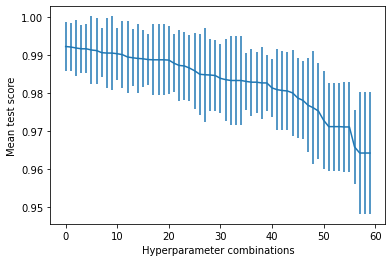

In [11]:
# plot model performance and error

results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)

plt.ylabel('Mean test score')
plt.xlabel('Hyperparameter combinations')

In [12]:
X_train_preds = search.predict_proba(X_train)[:,1]
X_test_preds = search.predict_proba(X_test)[:,1]

print('Train roc_auc: ', roc_auc_score(y_train, X_train_preds))
print('Test roc_auc: ', roc_auc_score(y_test, X_test_preds))

Train roc_auc:  1.0
Test roc_auc:  0.996766607877719


In [13]:
# let's make a function to evaluate the model performance based on
# single hyperparameters

def summarize_by_param(hparam):
    
    tmp = pd.concat([
        results.groupby(hparam)['mean_test_score'].mean(),
        results.groupby(hparam)['mean_test_score'].std(),
    ], axis=1)

    tmp.columns = ['mean_test_score', 'std_test_score']
    
    return tmp

In [14]:
# performance change for n_estimators

tmp = summarize_by_param('param_n_estimators')

tmp.head()

,mean_test_score,std_test_score
param_n_estimators,,
10,0.973408,0.006305
20,0.980841,0.005208
50,0.987426,0.002614
100,0.990141,0.002064


Text(0, 0.5, 'roc-auc')

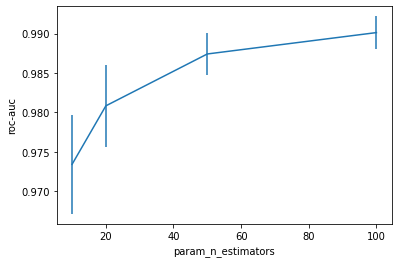

In [15]:
tmp['mean_test_score'].plot(yerr=[tmp['std_test_score'], tmp['std_test_score']], subplots=True)
plt.ylabel('roc-auc')

The optimal hyperparameter seems to be somewhere between 60 and 100.

Text(0, 0.5, 'roc-auc')

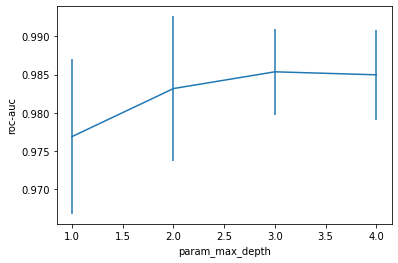

In [16]:
tmp = summarize_by_param('param_max_depth')
tmp['mean_test_score'].plot(yerr=[tmp['std_test_score'], tmp['std_test_score']], subplots=True)
plt.ylabel('roc-auc')

The optimal hyperparameter seems to be between 2 and 3.

array([<Axes: xlabel='param_min_samples_split'>], dtype=object)

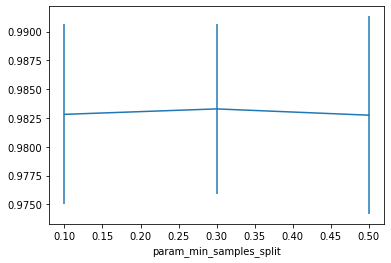

In [17]:
tmp = summarize_by_param('param_min_samples_split')
tmp['mean_test_score'].plot(yerr=[tmp['std_test_score'], tmp['std_test_score']], subplots=True)

This parameter does not seem to improve performance much.

In [18]:
# determine the hyperparameter space
param_grid = dict(
    n_estimators=[60, 80, 100, 120],
    max_depth=[2,3],
    loss = ['log_loss', 'exponential'],
    )

# set up the search
search = GridSearchCV(gbm, param_grid, scoring='roc_auc', cv=5, refit=True)

# find best hyperparameters
search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'loss': ['log_loss', 'exponential'],
                         'max_depth': [2, 3],
                         'n_estimators': [60, 80, 100, 120]},
             scoring='roc_auc')

In [19]:
# the best hyperparameters are stored in an attribute

search.best_params_

{'loss': 'exponential', 'max_depth': 2, 'n_estimators': 120}

In [20]:
results = pd.DataFrame(search.cv_results_)

results.sort_values(by='mean_test_score', ascending=False, inplace=True)

results.reset_index(drop=True, inplace=True)

results[[
    'param_max_depth', 'param_loss', 'param_n_estimators',
    'mean_test_score', 'std_test_score',
]].head(8)

,param_max_depth,param_loss,param_n_estimators,mean_test_score,std_test_score
0,2,exponential,120,0.993095,0.006174
1,2,exponential,100,0.992828,0.006021
2,2,exponential,80,0.992765,0.006340
3,2,log_loss,120,0.992284,0.006677
4,2,log_loss,100,0.992013,0.006848
5,2,exponential,60,0.991210,0.007305
6,2,log_loss,60,0.991066,0.006638
7,3,exponential,120,0.990954,0.009554


Text(0.5, 0, 'Hyperparameter combinations')

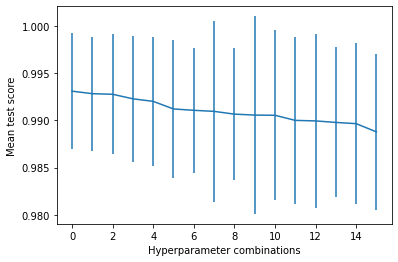

In [21]:
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)

plt.ylabel('Mean test score')
plt.xlabel('Hyperparameter combinations')

In [22]:
X_train_preds = search.predict_proba(X_train)[:,1]
X_test_preds = search.predict_proba(X_test)[:,1]

print('Train roc_auc: ', roc_auc_score(y_train, X_train_preds))
print('Test roc_auc: ', roc_auc_score(y_test, X_test_preds))

Train roc_auc:  0.9999999999999999
Test roc_auc:  0.9973544973544973
